# Data from the Web -  ADA 2017 Tutorial 

#### What do you find in this Notebook?

The purpose of the Notebook is to offer a **quick** overview on how to scrape a Web page. In details, we illustrate the two main libraries used for this purpose. Afterwords, we show how to retrieve data from the Web.

## Web scraping libraries

To fetch data from the Web with Python, you need to get use to two essential libraries:

 * [`Requests (HTTP)`](http://docs.python-requests.org/en/master/user/quickstart/): get the `html` page to parse.

 * [`Beautiful Soup (HTML Parsing)`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): parse the `html` and extract data.

In [28]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Make a `get` request

We start scraping this website: https://httpbin.org/ - HTTP Request & Response Service

The website offers some useful endpoints to check the content of our request. Some of them provides an 'echo service' that reply with the request received.

#### Example
Here we show an example on how use a get request. In particular, you see that we can get different information about the response:

* The status code which tells us whether everything is fine and if the request worked
* The headers
* Body of the response (typically HTML for webpages or JSON/XML for web services)

**NOTE:** this is an echo service, what you see is what we sent to the server

In [2]:
# Make the request
r = requests.get('https://httpbin.org/ip')

print('Response status code: {0}\n'.format(r.status_code))
print('Response headers: {0}\n'.format(r.headers))
print('Response body: {0}'.format(r.text))

Response status code: 200

Response headers: {'Connection': 'keep-alive', 'Server': 'meinheld/0.6.1', 'Date': 'Sat, 14 Oct 2017 19:45:49 GMT', 'Content-Type': 'application/json', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'X-Powered-By': 'Flask', 'X-Processed-Time': '0.000459909439087', 'Content-Length': '33', 'Via': '1.1 vegur'}

Response body: {
  "origin": "185.25.193.183"
}



If the body of the response is a JSON string, Requests offers a convenient way to parse the text and get a Python dictionary.

Let's try to get the current time from here: [https://now.httpbin.org/](https://now.httpbin.org/)

In [3]:
r = requests.get('https://now.httpbin.org/')
print('Response body (parsed json):')
r.json()

Response body (parsed json):


{'now': {'epoch': 1508010429.4275012,
  'iso8601': '2017-10-14T19:47:09.427501Z',
  'rfc2822': 'Sat, 14 Oct 2017 19:47:09 GMT',
  'rfc3339': '2017-10-14T19:47:09.42Z',
  'slang_date': 'today',
  'slang_time': 'now'},
 'urls': ['/', '/docs', '/when/:human-timestamp', '/parse/:machine-timestamp']}

This time, the `url` has been slightly changed to include a parameter (key1).

Remember that the with the GET method the parameters are part of the URL.

In [4]:
r = requests.get('https://httpbin.org/get?key1=value1')
r.json()

{'args': {'key1': 'value1'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.18.4'},
 'origin': '185.25.193.183',
 'url': 'https://httpbin.org/get?key1=value1'}

### Make a `post` request

A POST request can have the paramenters in the body. Let's how to do this with Requests:

In [5]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.post('https://httpbin.org/post', data=payload)
r.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key1': 'value1', 'key2': 'value2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Connection': 'close',
  'Content-Length': '23',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.18.4'},
 'json': None,
 'origin': '185.25.193.183',
 'url': 'https://httpbin.org/post'}

### Make a request and extract the Page Title!

* Do the request and get the `html`

In [6]:
# Do the request
r = requests.get('https://httpbin.org/html')
r.text[:300]

'<!DOCTYPE html>\n<html>\n  <head>\n  </head>\n  <body>\n      <h1>Herman Melville - Moby-Dick</h1>\n\n      <div>\n        <p>\n          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Per'

* Thus, we start to use our beloved `BeautifulSoup` to parse the HTML and we get the header

In [7]:
# Extract the header
soup = BeautifulSoup(r.text, 'html.parser')
soup.h1

<h1>Herman Melville - Moby-Dick</h1>

## Let's get interesting data - DBLP

*DBLP is a computer science bibliography website. Starting in 1993 at the University of Trier, Germany, it grew from a small collection of HTML files and became an organization hosting a database and logic programming bibliography site. DBLP listed more than 3.66 million journal articles, conference papers, and other publications on computer science in July 2016, up from about 14,000 in 1995.*

<div align="right">https://en.wikipedia.org/wiki/DBLP</div> 

We want to check the distribution of the publications by year of the president of EPFL - Martin Vetterli.

First of all, let's check the page with the data we need:

In [8]:
URL = 'http://dblp.uni-trier.de/pers/hd/v/Vetterli:Martin'

The page is public and accessible with a browser using a simple GET:

In [11]:
r = requests.get(URL)
page_body = r.text

Now the page content is downloaded and we can inspect the body of the response:

In [13]:
page_body[:500]

'<!DOCTYPE html>\n<html lang="en">\n<head data-urlpt="v/Vetterli:Martin"><meta charset="UTF-8" /><title>dblp: Martin Vetterli</title><link rel="apple-touch-icon" type="image/png" sizes="192x192" href="http://dblp.uni-trier.de/img/dblp.icon.192x192.png"><link rel="icon" type="image/png" sizes="192x192" href="http://dblp.uni-trier.de/img/dblp.icon.192x192.png"><link rel="icon" type="image/png" sizes="152x152" href="http://dblp.uni-trier.de/img/dblp.icon.152x152.png"><link rel="icon" type="image/png" '

It is pure HTML, and we need BeautifulSoup to parse the content. We can specify the parser we want to use html.parser, lxml, lxml-xml, xml, html5lib. Each of them has advantages and disadvantages - see documentation.

In [14]:
soup = BeautifulSoup(page_body, 'html.parser')

Now the page is parsed and we can read the data we need!

For example, let's get the title! Are we in the right page?

In [15]:
soup.title

<title>dblp: Martin Vetterli</title>

Yes! And we can get the clean text without HTML tags:

In [16]:
soup.title.string

'dblp: Martin Vetterli'

A more complex query now! Let's find all the links in the page. 

In HTML a link is defined using the tag &lt;A&gt;, and BeautifulSoup offers an easy way to find them:

In [20]:
all_links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(all_links)))

The webpage cointains 11405 links...


In [21]:
external_links = 0
for link in all_links:
    if(not link.get('href').startswith('http://dblp.uni-trier.de/')
       and link.get('href').startswith('http')):  # just an example, you need more checks
        external_links += 1

print('... and {0} of them point to external websites.'.format(external_links))

... and 6569 of them point to external websites.


Let's move on. Now we want to extract the sections that contain the publication details.

**The easiest way is to inspect the DOM of the web page with a browser.** Check with your browser how to isolate the portions of the page that represent publications. - Task not in this Notebook -

Ok, each row is composed by a &lt;li&gt; tag and has a class called 'entry':

In [22]:
publications_wrappers = soup.find_all('li', class_='entry')

Let's check the number of rows:

In [23]:
print('Total number of items: {0}'.format(len(publications_wrappers)))

Total number of items: 382


In [25]:
for p in publications_wrappers:
    print(p.find('span', class_='title').text)

Towards Generalized FRI Sampling With an Application to Source Resolution in Radioastronomy.
Sampling and Exact Reconstruction of Pulses with Variable Width.
Acoustic DoA Estimation by One Unsophisticated Sensor.
FRIDA: FRI-based DOA estimation for arbitrary array layouts.
Omnidirectional bats, point-to-plane distances, and the price of uniqueness.
Shape from bandwidth: The 2-D orthogonal projection case.
Unlabeled sensing: Reconstruction algorithm and theoretical guarantees.
MOOC Adventures in Signal Processing: Bringing DSP to the era of massive open online courses.
Where You Are Is Who You Are: User Identification by Matching Statistics.
Shapes From Pixels.
VITRAIL: Acquisition, Modeling, and Rendering of Stained Glass.
Sampling and Reconstruction of Shapes With Algebraic Boundaries.
EchoSLAM: Simultaneous localization and mapping with acoustic echoes.
The recursive hessian sketch for adaptive filtering.
Learning network structures from firing patterns.
Accurate recovery of a specul

In [29]:
publications_list = []
for p in publications_wrappers:
    title = p.find('span', class_='title').text  # get the title
    authos_list = p.find_all('span', {'itemprop': 'author'})  # get the authors list
    authors = [author.text for author in authos_list]  
    year = p.find('span', {'itemprop': 'datePublished'}).text
    publications_list.append({'title': title, 
                         'authors': authors, 
                         'year': int(year)})  # here you should validate the data

publications = pd.DataFrame.from_dict(publications_list)
publications.head()

,authors,title,year
0,"[Hanjie Pan, Thierry Blu, Martin Vetterli]",Towards Generalized FRI Sampling With an Appli...,2017
1,"[Gilles Baechler, Adam Scholefield, Loïc Babou...",Sampling and Exact Reconstruction of Pulses wi...,2017
2,"[Dalia El Badawy, Ivan Dokmanic, Martin Vetterli]",Acoustic DoA Estimation by One Unsophisticated...,2017
3,"[Hanjie Pan, Robin Scheibler, Eric Bezzam, Iva...",FRIDA: FRI-based DOA estimation for arbitrary ...,2017
4,"[Miranda Krekovic, Ivan Dokmanic, Martin Vette...","Omnidirectional bats, point-to-plane distances...",2017


In [30]:
import pandas as pd
import seaborn
%matplotlib inline

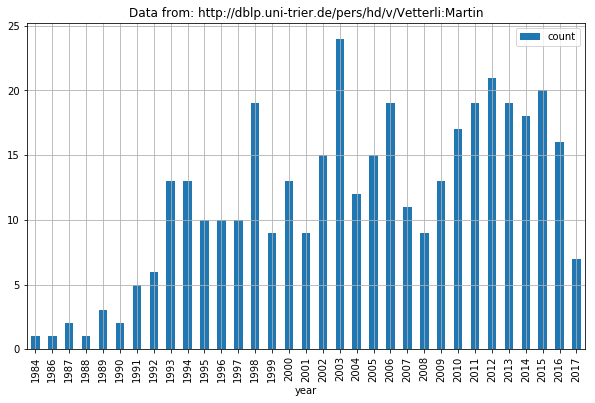

In [32]:
publications.groupby('year')\
    .count()\
    .rename(columns = {'title':'count'})\
    .plot(y='count', kind='bar', grid=True, figsize=(10, 6), title='Data from: ' + URL)